<a href="https://colab.research.google.com/github/kireayom16/classfiles/blob/main/Avances_del_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto de Análisis del Índice de Masa Corporal (IMC)

En este proyecto, aplicaremos varios conceptos de Machine Learning para analizar y predecir el Índice de Masa Corporal (IMC) utilizando un conjunto de datos de miembros de un gimnasio.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/classfiles/unidad2/gym_members_exercise_tracking.csv')


print("Primeras 5 filas del conjunto de datos:")
print(df.head())

print("\nInformación general del conjunto de datos:")
df.info()

Primeras 5 filas del conjunto de datos:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/we

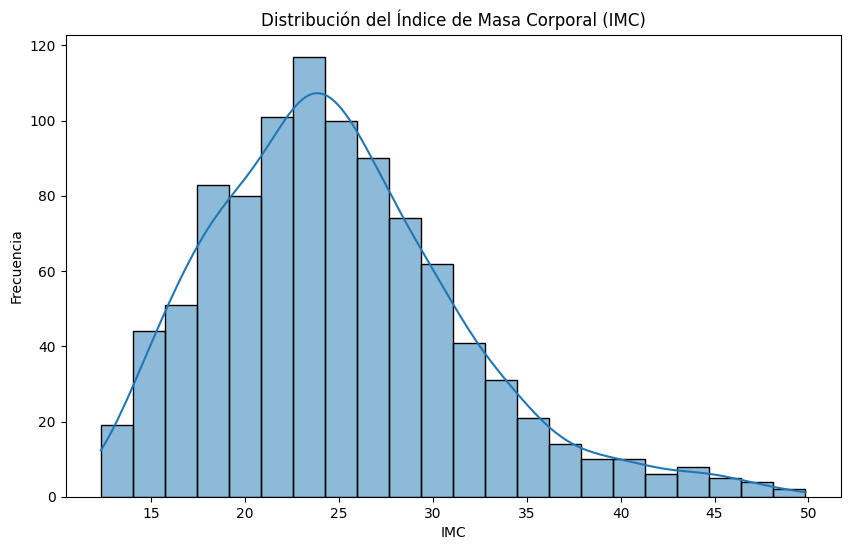

In [5]:
# Histograma del IMC
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True)
plt.title('Distribución del Índice de Masa Corporal (IMC)')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

In [6]:
# Gráficos de dispersión de algunas variables contra el IMC
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

Text(0.5, 1.0, 'Peso vs. IMC')

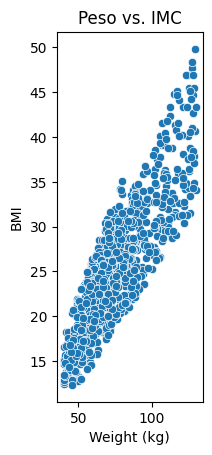

In [7]:
# Gráfico 1: Peso vs IMC
plt.subplot(1, 3, 1)
sns.scatterplot(x='Weight (kg)', y='BMI', data=df)
plt.title('Peso vs. IMC')

Text(0.5, 1.0, 'Porcentaje de Grasa vs. IMC')

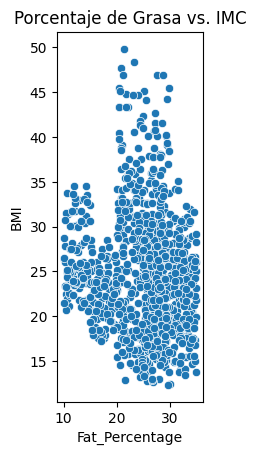

In [8]:
# Gráfico 2: Grasa Corporal vs IMC
plt.subplot(1, 3, 2)
sns.scatterplot(x='Fat_Percentage', y='BMI', data=df)
plt.title('Porcentaje de Grasa vs. IMC')

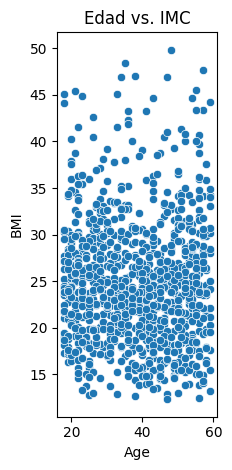

In [9]:
# Gráfico 3: Edad vs IMC
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='BMI', data=df)
plt.title('Edad vs. IMC')

plt.tight_layout()
plt.show()

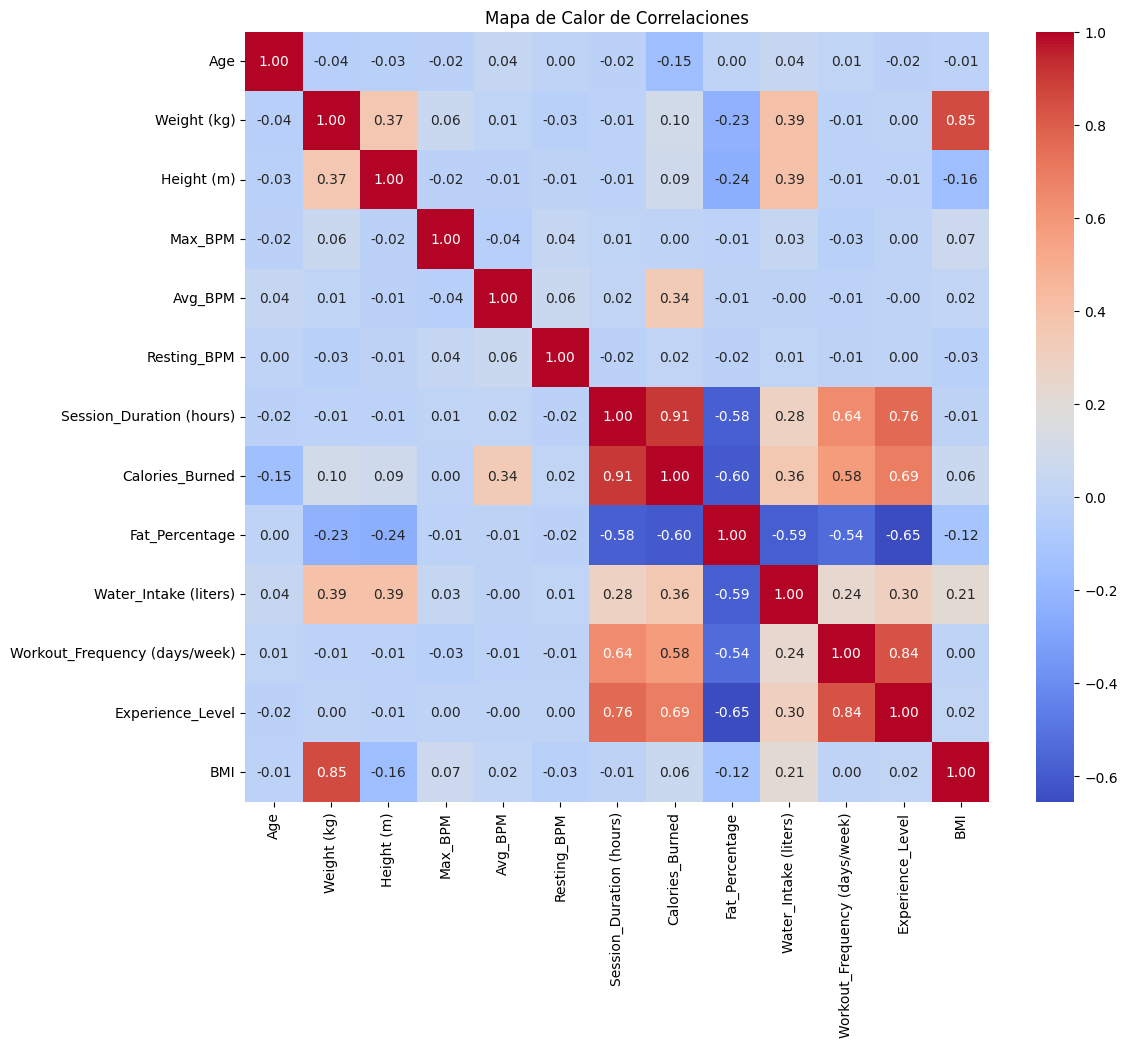

In [12]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 10))

# Seleccionar solo columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

## 2. Métodos de Normalización y Transformación en ML

La normalización es un paso crucial en el preprocesamiento de datos, especialmente para algoritmos de regresión. Ayuda a que todas las variables tengan una escala similar.

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_numeric = df.select_dtypes(include=['float64', 'int64'])

X = df_numeric.drop('BMI', axis=1)
y = df_numeric['BMI']

scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)


X_minmax_df = pd.DataFrame(X_minmax, columns=X.columns)

print("Datos originales:")
print(X.head())
print("\nDatos normalizados con Min-Max:")
print(X_minmax_df.head())

Datos originales:
   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  
0                    3.5                              4                 3  
1                    2.1                        

In [16]:
scaler_zscore = StandardScaler()
X_zscore = scaler_zscore.fit_transform(X)


X_zscore_df = pd.DataFrame(X_zscore, columns=X.columns)

print("Datos estandarizados con Z-Score:")
print(X_zscore_df.head())

Datos estandarizados con Z-Score:
        Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  1.422343     0.681493   -0.098545  0.010081  0.922970    -0.303555   
1  0.600965     0.049316   -1.508604 -0.076726  0.504494     0.515749   
2 -0.548964    -0.271491   -0.490228 -1.118414 -1.518142    -1.122858   
3 -1.123928    -0.974433   -0.176881  0.878155  1.411193    -0.849757   
4 -0.056137    -1.309393    0.528148  0.704540  0.992716     0.788850   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                  1.264598         1.495690       -1.978321   
1                  0.127098        -0.082284        1.426301   
2                 -0.427068        -0.838243        1.346380   
3                 -1.943735        -1.370351        0.611110   
4                 -1.797902        -1.282278        0.675047   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  
0               1.455967                       0.743295          1

## 3. Modelos de Regresión

Ahora, aplicaremos diferentes modelos de regresión para predecir el IMC. Dividiremos los datos en conjuntos de entrenamiento y prueba.

In [17]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.2, random_state=42)

In [18]:
#Regresión Lineal Múltiple
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predicciones y evaluación
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Resultados de la Regresión Lineal Múltiple:")
print(f'Error Cuadrático Medio (MSE): {mse_linear:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2_linear:.2f}')

Resultados de la Regresión Lineal Múltiple:
Error Cuadrático Medio (MSE): 0.62
Coeficiente de Determinación (R^2): 0.99


In [20]:
# Coeficientes
coef_linear = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo lineal:")
print(coef_linear)


Coeficientes del modelo lineal:
                               Coeficiente
Age                               0.173375
Weight (kg)                       6.885163
Height (m)                       -3.649573
Max_BPM                          -0.003611
Avg_BPM                          -0.276451
Resting_BPM                      -0.020765
Session_Duration (hours)         -0.785327
Calories_Burned                   0.841061
Fat_Percentage                    0.029385
Water_Intake (liters)             0.067349
Workout_Frequency (days/week)     0.020581
Experience_Level                  0.047974


In [21]:
# Regresión Lasso
from sklearn.linear_model import Lasso

# Crear y entrenar el modelo Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [22]:
# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nResultados de la Regresión Lasso:")
print(f'Error Cuadrático Medio (MSE): {mse_lasso:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2_lasso:.2f}')


Resultados de la Regresión Lasso:
Error Cuadrático Medio (MSE): 0.77
Coeficiente de Determinación (R^2): 0.98


In [23]:
# Coeficientes
coef_lasso = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo Lasso (algunos pueden ser cero):")
print(coef_lasso)


Coeficientes del modelo Lasso (algunos pueden ser cero):
                               Coeficiente
Age                               0.000000
Weight (kg)                       6.797828
Height (m)                       -3.418961
Max_BPM                           0.000000
Avg_BPM                           0.000000
Resting_BPM                      -0.000000
Session_Duration (hours)          0.000000
Calories_Burned                   0.000000
Fat_Percentage                   -0.000000
Water_Intake (liters)             0.000000
Workout_Frequency (days/week)     0.000000
Experience_Level                  0.000000


In [25]:
# Regresión Ridge
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [27]:
# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nResultados de la Regresión Ridge:")
print(f'Error Cuadrático Medio (MSE): {mse_ridge:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2_ridge:.2f}')


Resultados de la Regresión Ridge:
Error Cuadrático Medio (MSE): 0.63
Coeficiente de Determinación (R^2): 0.99


In [28]:
# Coeficientes
coef_ridge = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo Ridge:")
print(coef_ridge)


Coeficientes del modelo Ridge:
                               Coeficiente
Age                               0.163248
Weight (kg)                       6.874972
Height (m)                       -3.637923
Max_BPM                          -0.002471
Avg_BPM                          -0.255719
Resting_BPM                      -0.020023
Session_Duration (hours)         -0.729104
Calories_Burned                   0.778708
Fat_Percentage                    0.026427
Water_Intake (liters)             0.072699
Workout_Frequency (days/week)     0.021250
Experience_Level                  0.044406


## 4. Conclusión e Impacto en el Proyecto

En este proyecto sobre el IMC, los conceptos de preprocesamiento y regresión han sido fundamentales.

- **Análisis Exploratorio y Normalización**: El análisis inicial nos mostró la fuerte relación entre el peso y el IMC. La **normalización** (especialmente Z-Score) fue clave para que los modelos de regresión funcionaran correctamente, al poner todas las variables en la misma escala.

- **Regresión Lineal Múltiple**: Sirvió como un buen modelo base, mostrando qué variables tenían una relación lineal con el IMC. [

- **Regresión Lasso y Ridge**: Estos modelos más avanzados nos ayudaron a manejar la complejidad de los datos. **Lasso** fue particularmente útil para la **selección de características**, ya que al hacer algunos coeficientes cero, nos indica qué variables son menos importantes para predecir el IMC. **Ridge** es útil para manejar la multicolinealidad, lo que hace al modelo más estable.

En conclusión, la combinación de un buen preprocesamiento de datos con modelos de regresión regularizados como Lasso y Ridge nos permite construir un modelo predictivo robusto y entender mejor qué factores influyen en el Índice de Masa Corporal.